### Importing libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
import datetime as dt

### Loading Data

In [2]:
df = pd.read_csv('HU_File_Q1_S2.csv')

In [3]:
df.rename({'Calldate':'CallDate','Calltime':'CallTime'},inplace=True,axis=1)
df['ArrivalDiff'] = df.groupby(['CallDate'])['ArrivalTime'].diff().fillna(df['ArrivalTime'])
df['CallTime'] = pd.to_datetime(df['CallTime'])
df

,Unnamed: 0,CallDate,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff
0,1,2019-06-01,2019-06-01 07:00:00,145.402209,2019-06-01 07:02:25,Saturday,145.402209
1,2,2019-06-01,2019-06-01 07:00:00,162.846292,2019-06-01 07:02:42,Saturday,17.444083
2,3,2019-06-01,2019-06-01 07:00:00,218.327066,2019-06-01 07:03:38,Saturday,55.480774
3,4,2019-06-01,2019-06-01 07:00:00,252.200917,2019-06-01 07:04:12,Saturday,33.873851
4,5,2019-06-01,2019-06-01 07:00:00,324.761371,2019-06-01 07:05:24,Saturday,72.560455
5,6,2019-06-01,2019-06-01 07:00:00,350.362176,2019-06-01 07:05:50,Saturday,25.600805
6,7,2019-06-01,2019-06-01 07:00:00,393.885136,2019-06-01 07:06:33,Saturday,43.522959
7,8,2019-06-01,2019-06-01 07:00:00,450.519405,2019-06-01 07:07:30,Saturday,56.634269
8,9,2019-06-01,2019-06-01 07:00:00,471.515581,2019-06-01 07:07:51,Saturday,20.996176
9,10,2019-06-01,2019-06-01 07:00:00,555.790647,2019-06-01 07:09:15,Saturday,84.275066


### Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278492 entries, 0 to 278491
Data columns (total 7 columns):
Unnamed: 0     278492 non-null int64
CallDate       278492 non-null object
DialStart      278492 non-null object
ArrivalTime    278492 non-null float64
CallTime       278492 non-null datetime64[ns]
DayOfWeek      278492 non-null object
ArrivalDiff    278492 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 14.9+ MB


In [5]:
df.describe()

,Unnamed: 0,ArrivalTime,ArrivalDiff
count,278492.000000,278492.000000,278492.000000
mean,139246.500000,28825.297579,25.219585
std,80393.859921,16630.061089,28.791760
min,1.000000,0.087961,0.000007
25%,69623.750000,14422.316049,6.584051
50%,139246.500000,28760.921104,16.195255
75%,208869.250000,43234.471527,33.389303
max,278492.000000,57599.821640,498.859229


Tried to see which days of the week the call center functions.

In [6]:
df['DayOfWeek'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [7]:
df['Calldate'] = pd.to_datetime(df['CallDate'])

Calculated the difference in Arrivals of consecutive calls.

Grouped Calls by time and tried to see what is the maximum time till which the call center functions. It seems the call center functions till 23:00.

In [8]:
df.groupby(['CallDate'])['CallTime'].max()

CallDate
2019-06-01   2019-06-01 22:59:14
2019-06-02   2019-06-02 22:59:38
2019-06-03   2019-06-03 22:59:51
2019-06-04   2019-06-04 22:59:55
2019-06-05   2019-06-05 22:59:52
2019-06-06   2019-06-06 22:59:51
2019-06-07   2019-06-07 22:59:51
2019-06-08   2019-06-08 22:59:47
2019-06-09   2019-06-09 22:56:49
2019-06-10   2019-06-10 22:59:42
2019-06-11   2019-06-11 22:59:42
2019-06-12   2019-06-12 22:59:55
2019-06-13   2019-06-13 22:58:38
2019-06-14   2019-06-14 22:59:45
2019-06-15   2019-06-15 22:58:43
2019-06-16   2019-06-16 22:59:38
2019-06-17   2019-06-17 22:59:51
2019-06-18   2019-06-18 22:58:19
2019-06-19   2019-06-19 22:59:51
2019-06-20   2019-06-20 22:59:43
2019-06-21   2019-06-21 22:59:56
2019-06-22   2019-06-22 22:59:22
2019-06-23   2019-06-23 22:59:24
2019-06-24   2019-06-24 22:59:56
2019-06-25   2019-06-25 22:59:54
2019-06-26   2019-06-26 22:59:49
2019-06-27   2019-06-27 22:59:59
2019-06-28   2019-06-28 22:59:33
2019-06-29   2019-06-29 22:59:52
2019-06-30   2019-06-30 22:57:59
 

Plotted the arrival differences between calls. We can see the arrival differences follow an exponential distribution.

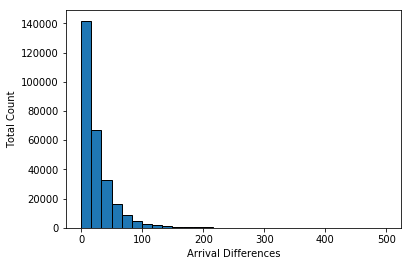

In [9]:
plt.xlabel("Arrival Differences")
plt.ylabel("Total Count")
plt.hist(df['ArrivalDiff'],bins=30,edgecolor='black')
plt.show()

We plotted the arrival differences with respect to call date. We can see a sort of a repeating pattern here.

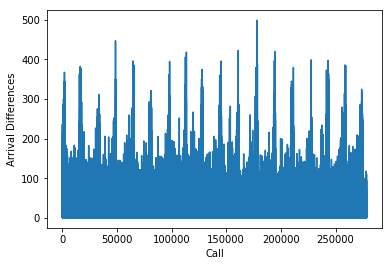

In [10]:
cd = df[['CallDate','ArrivalDiff']]
l = [i for i in range(len(cd.CallDate))]
plt.plot(l,cd.ArrivalDiff)
plt.xlabel('Call')
plt.ylabel('Arrival Differences')
plt.show()

We grouped by call date and found out the number of calls on each date.

In [11]:
callsEachDay = df.groupby(["CallDate"]).size()

In [12]:
callsEachDay

CallDate
2019-06-01    1323
2019-06-02     980
2019-06-03    2508
2019-06-04    2668
2019-06-05    2879
2019-06-06    2359
2019-06-07    2667
2019-06-08    1293
2019-06-09    1143
2019-06-10    2958
2019-06-11    3160
2019-06-12    2841
2019-06-13    2492
2019-06-14    2477
2019-06-15    1380
2019-06-16    1082
2019-06-17    2693
2019-06-18    2503
2019-06-19    2861
2019-06-20    2417
2019-06-21    2150
2019-06-22    1428
2019-06-23    1130
2019-06-24    3577
2019-06-25    3077
2019-06-26    2513
2019-06-27    2178
2019-06-28    2252
2019-06-29    1402
2019-06-30    1068
              ... 
2019-09-01    1061
2019-09-02    3070
2019-09-03    2981
2019-09-04    2711
2019-09-05    2778
2019-09-06    2388
2019-09-07    1441
2019-09-08    1128
2019-09-09    2716
2019-09-10    3047
2019-09-11    2916
2019-09-12    1868
2019-09-13    2623
2019-09-14    1431
2019-09-15     962
2019-09-16    3378
2019-09-17    3138
2019-09-18    2508
2019-09-19    2278
2019-09-20    1896
2019-09-21    1324
201

We also found out the average number of calls each day.

In [13]:
statistics.mean(callsEachDay)

2282.72131147541

In [14]:
callsEachDay = pd.DataFrame(callsEachDay)

callsEachDay.reset_index(inplace=True)
callsEachDay.rename({0:'TotalCalls'},inplace=True,axis=1)
callsEachDay


,CallDate,TotalCalls
0,2019-06-01,1323
1,2019-06-02,980
2,2019-06-03,2508
3,2019-06-04,2668
4,2019-06-05,2879
5,2019-06-06,2359
6,2019-06-07,2667
7,2019-06-08,1293
8,2019-06-09,1143
9,2019-06-10,2958


In [15]:
callsEachDay.describe()

,TotalCalls
count,122.000000
mean,2282.721311
std,765.917591
min,962.000000
25%,1428.500000
50%,2475.000000
75%,2810.250000
max,3857.000000


We made a plot of call count against each date.

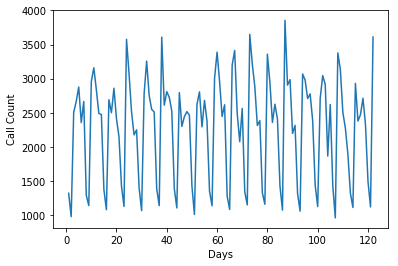

In [18]:
lst = [i for i in range(1,123)]
plt.xlabel('Days')
plt.ylabel("Call Count")
plt.plot(lst,callsEachDay.TotalCalls)
plt.show()

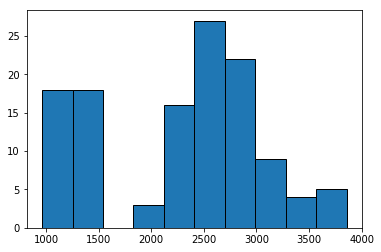

In [19]:
plt.hist(callsEachDay.TotalCalls,edgecolor='black')
plt.show()

We also calculated the call count for each day of Week.

In [20]:
callsByDayOfWeek = df.groupby(["DayOfWeek"]).size()

In [21]:
callsByDayOfWeek

DayOfWeek
Friday       40963
Monday       56332
Saturday     24785
Sunday       19671
Thursday     41236
Tuesday      49810
Wednesday    45695
dtype: int64

In [22]:
callsWithDay = df.groupby(["CallDate","DayOfWeek"]).size()

In [23]:
data = pd.DataFrame(callsWithDay)
data.reset_index(inplace=True)
data

,CallDate,DayOfWeek,0
0,2019-06-01,Saturday,1323
1,2019-06-02,Sunday,980
2,2019-06-03,Monday,2508
3,2019-06-04,Tuesday,2668
4,2019-06-05,Wednesday,2879
5,2019-06-06,Thursday,2359
6,2019-06-07,Friday,2667
7,2019-06-08,Saturday,1293
8,2019-06-09,Sunday,1143
9,2019-06-10,Monday,2958


We made a scatter and a swarm plot of call counts against day of Week. We found that there is a subtle pattern. The call counts against the day of week are quite consistent i.e. on Mondays we can expect 2500-4000 calls, on Tuesdays we can expect 2400-3500 calls so and so forth. However, compared to the previous dataset the data points are quite spread out.

[]

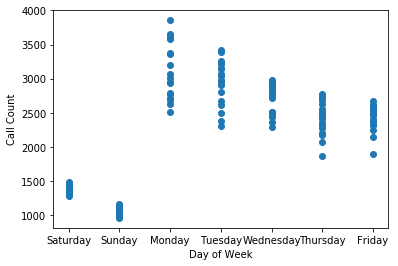

In [24]:
plt.xlabel('Day of Week')
plt.ylabel('Call Count')
plt.scatter(data['DayOfWeek'],data[0])
plt.plot()

[]

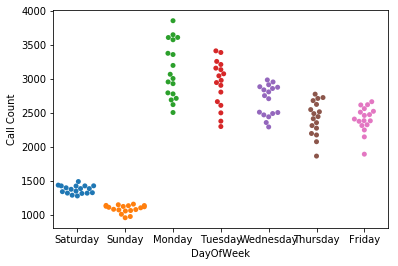

In [25]:
plt.xlabel('Day of Week')
plt.ylabel('Call Count')
sns.swarmplot(data['DayOfWeek'],list(data[0]))
plt.plot()

We divide the day into 4 chunks i.e. morning afternoon and evening. To see if there is a particular time frame of the day where we can expect more calls.

In [26]:
df['CallTiming'] = df['CallTime'].dt.time

In [27]:
morning = (df['CallTiming']>=dt.time(hour=7,minute=0))&(df['CallTiming']<=dt.time(hour=12,minute=0))
afternoon = (df['CallTiming']>dt.time(hour=12,minute=0))&(df['CallTiming']<=dt.time(hour=16,minute=0))
evening = (df['CallTiming']>dt.time(hour=16,minute=0))&(df['CallTiming']<=dt.time(hour=19,minute=0))
night = (df['CallTiming']>dt.time(hour=19,minute=0))&(df['CallTiming']<=dt.time(hour=23,minute=59))

In [28]:
df.loc[morning,'Interval'] = 'morning'
df.loc[afternoon,'Interval'] = 'afternoon'
df.loc[evening,'Interval'] = 'evening'
df.loc[night,'Interval'] = 'night'

In [29]:
countByInterval = df.groupby(['CallDate','Interval']).size()
#countByInterval

In [30]:
countByInterval = pd.DataFrame(countByInterval)
countByInterval.reset_index(inplace=True)
countByInterval

,CallDate,Interval,0
0,2019-06-01,afternoon,333
1,2019-06-01,evening,245
2,2019-06-01,morning,386
3,2019-06-01,night,359
4,2019-06-02,afternoon,255
5,2019-06-02,evening,182
6,2019-06-02,morning,306
7,2019-06-02,night,237
8,2019-06-03,afternoon,645
9,2019-06-03,evening,447


The swarm plot shows that Mornings have more calls, Afternoons and Nights have more or less same number of calls. Evening has lesser number of call. This may be also due to the fact that the number of hours for morning, night, afternoon and evening are different. Hence, we cannot say anything conclusively here.

[]

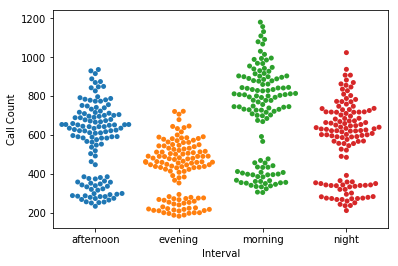

In [31]:
plt.xlabel('Interval')
plt.ylabel('Call Count')
sns.swarmplot(countByInterval['Interval'],list(countByInterval[0]))
plt.plot()

In [32]:
countByDayInterval = df.groupby(['DayOfWeek','Interval']).size()


In [33]:
countByDayInterval = pd.DataFrame(countByDayInterval)
countByDayInterval.reset_index(inplace=True)
countByDayInterval.sort_values(by=0)

,DayOfWeek,Interval,0
13,Sunday,evening,3703
9,Saturday,evening,4706
15,Sunday,night,4782
12,Sunday,afternoon,4918
11,Saturday,night,6226
14,Sunday,morning,6268
8,Saturday,afternoon,6287
10,Saturday,morning,7566
17,Thursday,evening,7607
1,Friday,evening,7643


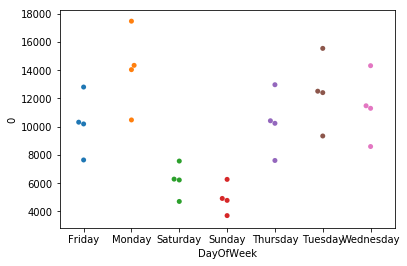

In [34]:
sns.swarmplot(countByDayInterval['DayOfWeek'],countByDayInterval[0])
plt.show()

We break each day into hours and then create a histogram to see is there a particular hour on each day of the week which has more calls. More or less from the histograms it seems that the calls are randomly distributed in the day and there is no peak hour.

We also make a histogram of arrival differences of each day of the week. The histograms show that for each day of the week the data is also exponentially distributed.

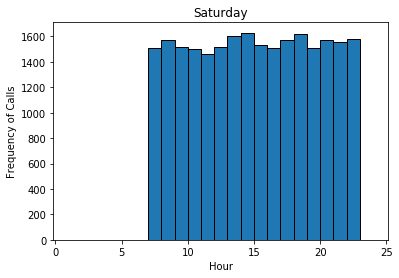

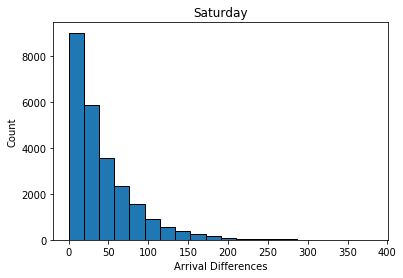

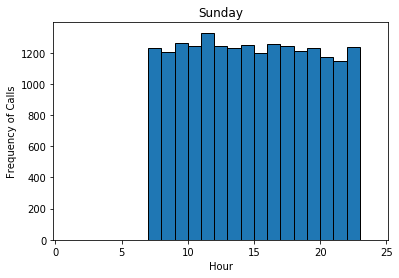

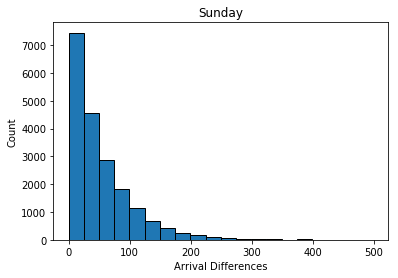

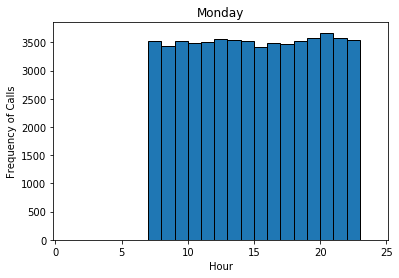

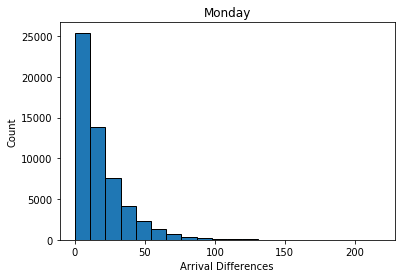

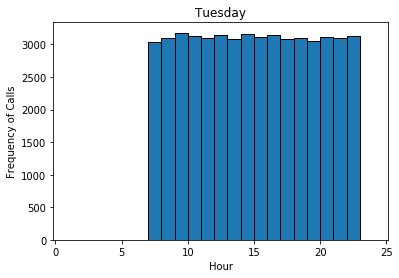

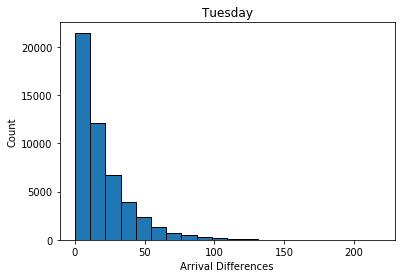

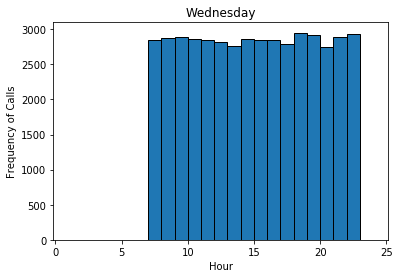

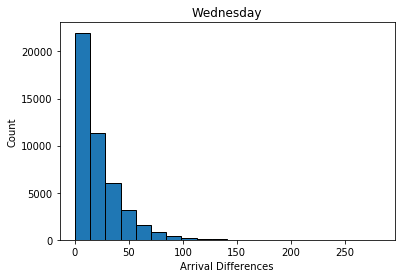

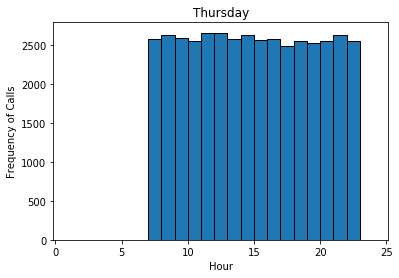

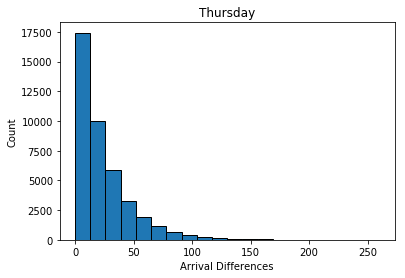

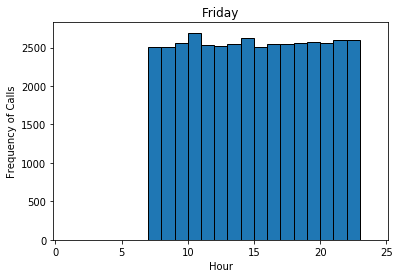

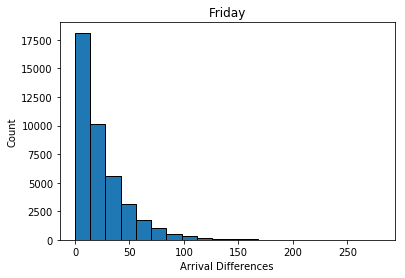

In [35]:
days = list(df.DayOfWeek.unique())
for i in days:
    data = df[df["DayOfWeek"]==i]
    plt.hist(data['CallTime'].dt.hour,edgecolor='black',bins=list(range(1,25)))
    plt.title(i)
    plt.xlabel('Hour')
    plt.ylabel('Frequency of Calls')
    plt.show()
    plt.title(i)
    plt.hist(data['ArrivalDiff'],edgecolor='black',bins=20)
    plt.xlabel('Arrival Differences')
    plt.ylabel('Count')

    plt.show()


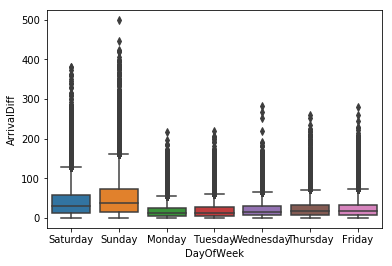

In [36]:
sns.boxplot(x="DayOfWeek", y="ArrivalDiff", data=df)
plt.show()

Also made table of call counts for each hour against the Days of Week.

In [37]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

days = list(df.DayOfWeek.unique())
for i in days:
    print(i)
    data = df[df["DayOfWeek"]==i]
    print(data.groupby(data["CallTime"].dt.hour).count())

Saturday
          Unnamed: 0  CallDate  DialStart  ArrivalTime  CallTime  DayOfWeek  ArrivalDiff  Calldate  CallTiming  Interval
CallTime                                                                                                                
7               1506      1506       1506         1506      1506       1506         1506      1506        1506      1506
8               1574      1574       1574         1574      1574       1574         1574      1574        1574      1574
9               1520      1520       1520         1520      1520       1520         1520      1520        1520      1520
10              1504      1504       1504         1504      1504       1504         1504      1504        1504      1504
11              1462      1462       1462         1462      1462       1462         1462      1462        1462      1462
12              1518      1518       1518         1518      1518       1518         1518      1518        1518      1518
13              1605   

          Unnamed: 0  CallDate  DialStart  ArrivalTime  CallTime  DayOfWeek  ArrivalDiff  Calldate  CallTiming  Interval
CallTime                                                                                                                
7               2850      2850       2850         2850      2850       2850         2850      2850        2850      2850
8               2870      2870       2870         2870      2870       2870         2870      2870        2870      2870
9               2886      2886       2886         2886      2886       2886         2886      2886        2886      2886
10              2869      2869       2869         2869      2869       2869         2869      2869        2869      2869
11              2843      2843       2843         2843      2843       2843         2843      2843        2843      2843
12              2813      2813       2813         2813      2813       2813         2813      2813        2813      2813
13              2765      2765  

In [38]:
count = df.groupby(pd.Grouper(key='CallTime', freq='H')).mean()


In [39]:
count

,Unnamed: 0,ArrivalTime,ArrivalDiff
CallTime,,,
2019-06-01 07:00:00,35.5,1819.350631,49.672226
2019-06-01 08:00:00,110.0,5438.332864,45.931613
2019-06-01 09:00:00,189.5,8956.753261,45.716413
2019-06-01 10:00:00,267.0,12675.576282,48.492324
2019-06-01 11:00:00,345.5,16325.504234,43.107078
2019-06-01 12:00:00,427.5,19709.661231,44.227080
2019-06-01 13:00:00,509.5,23425.157236,44.227767
2019-06-01 14:00:00,593.0,26766.705651,42.398234
2019-06-01 15:00:00,677.5,30725.413149,41.597971


In [40]:
count = count[count['ArrivalTime'].isna()==False]

In [41]:
count.reset_index(inplace=True)
count

,CallTime,Unnamed: 0,ArrivalTime,ArrivalDiff
0,2019-06-01 07:00:00,35.5,1819.350631,49.672226
1,2019-06-01 08:00:00,110.0,5438.332864,45.931613
2,2019-06-01 09:00:00,189.5,8956.753261,45.716413
3,2019-06-01 10:00:00,267.0,12675.576282,48.492324
4,2019-06-01 11:00:00,345.5,16325.504234,43.107078
5,2019-06-01 12:00:00,427.5,19709.661231,44.227080
6,2019-06-01 13:00:00,509.5,23425.157236,44.227767
7,2019-06-01 14:00:00,593.0,26766.705651,42.398234
8,2019-06-01 15:00:00,677.5,30725.413149,41.597971
9,2019-06-01 16:00:00,756.0,34222.479725,50.339594


In [42]:
count['Date'] = count['CallTime'].dt.date
#count.sort_values(['Date','ArrivalTime'], inplace=True,ascending = [True,False])
#count.drop_duplicates(['Date'], inplace=True)
count

c:\users\syed bilal hoda\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CallTime,Unnamed: 0,ArrivalTime,ArrivalDiff,Date
0,2019-06-01 07:00:00,35.5,1819.350631,49.672226,2019-06-01
1,2019-06-01 08:00:00,110.0,5438.332864,45.931613,2019-06-01
2,2019-06-01 09:00:00,189.5,8956.753261,45.716413,2019-06-01
3,2019-06-01 10:00:00,267.0,12675.576282,48.492324,2019-06-01
4,2019-06-01 11:00:00,345.5,16325.504234,43.107078,2019-06-01
5,2019-06-01 12:00:00,427.5,19709.661231,44.227080,2019-06-01
6,2019-06-01 13:00:00,509.5,23425.157236,44.227767,2019-06-01
7,2019-06-01 14:00:00,593.0,26766.705651,42.398234,2019-06-01
8,2019-06-01 15:00:00,677.5,30725.413149,41.597971,2019-06-01
9,2019-06-01 16:00:00,756.0,34222.479725,50.339594,2019-06-01


In [43]:
len(count)

1952

In [44]:
df.rename(columns={'CallDate':'Date'},inplace=True)

In [45]:
unique = df.drop_duplicates(['Date'])
unique = unique[['Date','DayOfWeek']]
unique

,Date,DayOfWeek
0,2019-06-01,Saturday
1323,2019-06-02,Sunday
2303,2019-06-03,Monday
4811,2019-06-04,Tuesday
7479,2019-06-05,Wednesday
10358,2019-06-06,Thursday
12717,2019-06-07,Friday
15384,2019-06-08,Saturday
16677,2019-06-09,Sunday
17820,2019-06-10,Monday


In [46]:
count['Date'] = pd.to_datetime(count['Date'])

c:\users\syed bilal hoda\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 274881
Data columns (total 2 columns):
Date         122 non-null object
DayOfWeek    122 non-null object
dtypes: object(2)
memory usage: 2.9+ KB


In [48]:
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 5 columns):
CallTime       1952 non-null datetime64[ns]
Unnamed: 0     1952 non-null float64
ArrivalTime    1952 non-null float64
ArrivalDiff    1952 non-null float64
Date           1952 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3)
memory usage: 76.3 KB


In [49]:
unique['Date'] = pd.to_datetime(unique['Date'])
data = pd.merge(count,unique,left_on='Date',right_on='Date',how='inner')


In [50]:
data

,CallTime,Unnamed: 0,ArrivalTime,ArrivalDiff,Date,DayOfWeek
0,2019-06-01 07:00:00,35.5,1819.350631,49.672226,2019-06-01,Saturday
1,2019-06-01 08:00:00,110.0,5438.332864,45.931613,2019-06-01,Saturday
2,2019-06-01 09:00:00,189.5,8956.753261,45.716413,2019-06-01,Saturday
3,2019-06-01 10:00:00,267.0,12675.576282,48.492324,2019-06-01,Saturday
4,2019-06-01 11:00:00,345.5,16325.504234,43.107078,2019-06-01,Saturday
5,2019-06-01 12:00:00,427.5,19709.661231,44.227080,2019-06-01,Saturday
6,2019-06-01 13:00:00,509.5,23425.157236,44.227767,2019-06-01,Saturday
7,2019-06-01 14:00:00,593.0,26766.705651,42.398234,2019-06-01,Saturday
8,2019-06-01 15:00:00,677.5,30725.413149,41.597971,2019-06-01,Saturday
9,2019-06-01 16:00:00,756.0,34222.479725,50.339594,2019-06-01,Saturday


Mean Arrival Differences for each day of the week for each date. We can see from the table that the Arrival Differences of all Mondays are close. The Arrival Differences of all Tuesdays are also close together and so an so forth.

In [51]:
data.groupby(['DayOfWeek','Date']).mean()

Unnamed: 0   ArrivalTime  ArrivalDiff
DayOfWeek Date                                               
Friday    2019-06-07   14063.40625  28814.426198    21.682708
          2019-06-14   30533.78125  28805.749290    23.379589
          2019-06-21   45739.18750  28782.796832    26.997485
          2019-06-28   61857.31250  28815.117194    25.815004
          2019-07-05   78063.40625  28805.053007    23.018798
          2019-07-12   94868.50000  28811.901772    22.950730
          2019-07-19  109931.96875  28795.213860    23.617994
          2019-07-26  125176.71875  28810.922612    24.429742
          2019-08-02  142002.90625  28829.467032    22.090492
          2019-08-09  158156.84375  28798.244846    22.582664
          2019-08-16  175183.18750  28811.325937    24.241552
          2019-08-23  191381.00000  28790.303040    24.040584
          2019-08-30  208217.34375  28788.095358    24.997084
          2019-09-06  224454.37500  28769.346838    24.344903
          2019-09-13  240082.46875  28842.119801    22.061341
          2019-09-20  256038.06250  28823.239472    30.624255
          2019-09-27  271107.25000  28833.138350    24.836652
Monday    2019-06-03    3544.68750  28791.982840    23.181746
          2019-06-10   19285.12500  28838.545848    19.572376
          2019-06-17   35548.28125  28857.178929    21.461047
          2019-06-24   51166.40625  28780.728939    16.176060
          2019-07-01   66870.43750  28798.545335    20.834954
          2019-07-08   83665.31250  28804.989889    15.996420
          2019-07-15  100034.90625  28793.384866    20.760256
          2019-07-22  114926.18750  28808.819378    22.070096
          2019-07-29  130406.12500  28821.729769    19.297348
          2019-08-05  147287.93750  28803.925700    18.030463
          2019-08-12  163765.90625  28792.562751    15.827256
          2019-08-19  180539.43750  28798.725647    17.191563
          2019-08-26  196985.59375  28809.672877    14.974391
          2019-09-02  213263.25000  28796.870665    18.850412
          2019-09-09  229576.75000  28778.903033    21.343412
          2019-09-16  245454.00000  28810.329284    17.149750
          2019-09-23  260909.25000  28788.732761    19.689151
          2019-09-30  276659.59375  28797.514606    16.062705
Saturday  2019-06-01     638.53125  28793.206997    43.782790
          2019-06-08   16021.09375  28824.380410    44.959466
          2019-06-15   32426.06250  28832.196365    42.531614
          2019-06-22   47550.62500  28795.648100    40.822713
          2019-06-29   63694.87500  28770.343986    41.272654
          2019-07-06   80001.12500  28773.201307    42.017559
          2019-07-13   96827.31250  28789.069925    41.753906
          2019-07-20  111898.93750  28816.468544    40.854611
          2019-07-27  127070.40625  28815.459004    42.888838
          2019-08-03  143941.68750  28814.238841    45.660220
          2019-08-10  160101.03125  28823.677599    43.469014
          2019-08-17  177036.68750  28808.503322    43.823318
          2019-08-24  193301.06250  28815.715886    40.768784
          2019-08-31  210025.21875  28809.202177    43.925988
          2019-09-07  226400.59375  28858.248320    40.398128
          2019-09-14  242125.90625  28813.896631    40.458767
          2019-09-21  257639.06250  28806.272729    44.086442
          2019-09-28  272994.37500  28841.013722    38.795976
Sunday    2019-06-02    1816.31250  28853.838603    59.682894
          2019-06-09   17250.90625  28839.617410    50.363182
          2019-06-16   33668.81250  28777.948658    53.897631
          2019-06-23   48836.50000  28792.676834    51.320122
          2019-06-30   64935.68750  28782.978069    54.743247
          2019-07-07   81280.53125  28741.621689    50.844477
          2019-07-14   98095.68750  28778.506452    52.923372
          2019-07-21  113112.21875  28803.516821    57.244632
          2019-07-28  128317.03125  28750.529188    51.456829
          2019-08-04  145142.87500  28808.429624    53.7

In [52]:
for i in days:
    print(i)
    print(data[data["DayOfWeek"]==i])


Saturday
                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
0    2019-06-01 07:00:00        35.5   1819.350631    49.672226 2019-06-01  Saturday
1    2019-06-01 08:00:00       110.0   5438.332864    45.931613 2019-06-01  Saturday
2    2019-06-01 09:00:00       189.5   8956.753261    45.716413 2019-06-01  Saturday
3    2019-06-01 10:00:00       267.0  12675.576282    48.492324 2019-06-01  Saturday
4    2019-06-01 11:00:00       345.5  16325.504234    43.107078 2019-06-01  Saturday
5    2019-06-01 12:00:00       427.5  19709.661231    44.227080 2019-06-01  Saturday
6    2019-06-01 13:00:00       509.5  23425.157236    44.227767 2019-06-01  Saturday
7    2019-06-01 14:00:00       593.0  26766.705651    42.398234 2019-06-01  Saturday
8    2019-06-01 15:00:00       677.5  30725.413149    41.597971 2019-06-01  Saturday
9    2019-06-01 16:00:00       756.0  34222.479725    50.339594 2019-06-01  Saturday
10   2019-06-01 17:00:00       833.0  37928.334221    44

                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
16   2019-06-02 07:00:00      1354.0   1855.768929    58.370643 2019-06-02    Sunday
17   2019-06-02 08:00:00      1416.5   5345.786108    55.517759 2019-06-02    Sunday
18   2019-06-02 09:00:00      1478.0   8821.530527    61.990318 2019-06-02    Sunday
19   2019-06-02 10:00:00      1543.0  12591.600381    51.054582 2019-06-02    Sunday
20   2019-06-02 11:00:00      1604.0  16469.823919    69.485042 2019-06-02    Sunday
21   2019-06-02 12:00:00      1659.5  19928.584318    59.852871 2019-06-02    Sunday
22   2019-06-02 13:00:00      1723.0  23573.328862    54.307117 2019-06-02    Sunday
23   2019-06-02 14:00:00      1795.0  27040.964021    46.505857 2019-06-02    Sunday
24   2019-06-02 15:00:00      1859.0  30584.412404    71.016971 2019-06-02    Sunday
25   2019-06-02 16:00:00      1915.0  34398.028604    58.968023 2019-06-02    Sunday
26   2019-06-02 17:00:00      1973.5  37888.824417    64.602366 2

                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
48   2019-06-04 07:00:00      4896.0   1705.044870    21.099510 2019-06-04   Tuesday
49   2019-06-04 08:00:00      5062.5   5318.315698    21.762153 2019-06-04   Tuesday
50   2019-06-04 09:00:00      5235.0   8993.839987    20.165617 2019-06-04   Tuesday
51   2019-06-04 10:00:00      5406.0  12464.247648    22.199708 2019-06-04   Tuesday
52   2019-06-04 11:00:00      5566.0  16310.810891    22.879530 2019-06-04   Tuesday
53   2019-06-04 12:00:00      5724.0  19732.545941    22.833941 2019-06-04   Tuesday
54   2019-06-04 13:00:00      5887.5  23403.658353    21.179082 2019-06-04   Tuesday
55   2019-06-04 14:00:00      6060.0  26891.823505    20.617037 2019-06-04   Tuesday
56   2019-06-04 15:00:00      6232.5  30535.904031    21.193473 2019-06-04   Tuesday
57   2019-06-04 16:00:00      6405.5  34149.436180    20.445353 2019-06-04   Tuesday
58   2019-06-04 17:00:00      6569.5  37724.141381    23.564334 2

                CallTime  Unnamed: 0   ArrivalTime  ArrivalDiff       Date DayOfWeek
80   2019-06-06 07:00:00     10433.5   1756.199285    23.989625 2019-06-06  Thursday
81   2019-06-06 08:00:00     10576.5   5375.258459    26.363345 2019-06-06  Thursday
82   2019-06-06 09:00:00     10718.0   8878.649381    24.490792 2019-06-06  Thursday
83   2019-06-06 10:00:00     10871.0  12600.563471    22.691837 2019-06-06  Thursday
84   2019-06-06 11:00:00     11015.5  16247.517292    27.550208 2019-06-06  Thursday
85   2019-06-06 12:00:00     11163.5  19862.389105    21.678526 2019-06-06  Thursday
86   2019-06-06 13:00:00     11318.5  23402.070801    25.106812 2019-06-06  Thursday
87   2019-06-06 14:00:00     11466.0  26820.758759    23.907127 2019-06-06  Thursday
88   2019-06-06 15:00:00     11606.5  30561.388454    27.563396 2019-06-06  Thursday
89   2019-06-06 16:00:00     11745.0  34142.066982    24.419622 2019-06-06  Thursday
90   2019-06-06 17:00:00     11887.5  37754.751770    26.291176 2

Checking how many Arrival Differences are greater or less than a certain threshold.

In [53]:
df[df['ArrivalDiff']<50]

,Unnamed: 0,Date,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff,Calldate,CallTiming,Interval
1,2,2019-06-01,2019-06-01 07:00:00,162.846292,2019-06-01 07:02:42,Saturday,17.444083,2019-06-01,07:02:42,morning
3,4,2019-06-01,2019-06-01 07:00:00,252.200917,2019-06-01 07:04:12,Saturday,33.873851,2019-06-01,07:04:12,morning
5,6,2019-06-01,2019-06-01 07:00:00,350.362176,2019-06-01 07:05:50,Saturday,25.600805,2019-06-01,07:05:50,morning
6,7,2019-06-01,2019-06-01 07:00:00,393.885136,2019-06-01 07:06:33,Saturday,43.522959,2019-06-01,07:06:33,morning
8,9,2019-06-01,2019-06-01 07:00:00,471.515581,2019-06-01 07:07:51,Saturday,20.996176,2019-06-01,07:07:51,morning
10,11,2019-06-01,2019-06-01 07:00:00,601.985319,2019-06-01 07:10:01,Saturday,46.194672,2019-06-01,07:10:01,morning
11,12,2019-06-01,2019-06-01 07:00:00,646.722116,2019-06-01 07:10:46,Saturday,44.736797,2019-06-01,07:10:46,morning
12,13,2019-06-01,2019-06-01 07:00:00,673.426223,2019-06-01 07:11:13,Saturday,26.704106,2019-06-01,07:11:13,morning
14,15,2019-06-01,2019-06-01 07:00:00,811.071456,2019-06-01 07:13:31,Saturday,20.517861,2019-06-01,07:13:31,morning
17,18,2019-06-01,2019-06-01 07:00:00,979.213850,2019-06-01 07:16:19,Saturday,30.522475,2019-06-01,07:16:19,morning


In [54]:
df[df['ArrivalDiff']>50]

,Unnamed: 0,Date,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff,Calldate,CallTiming,Interval
0,1,2019-06-01,2019-06-01 07:00:00,145.402209,2019-06-01 07:02:25,Saturday,145.402209,2019-06-01,07:02:25,morning
2,3,2019-06-01,2019-06-01 07:00:00,218.327066,2019-06-01 07:03:38,Saturday,55.480774,2019-06-01,07:03:38,morning
4,5,2019-06-01,2019-06-01 07:00:00,324.761371,2019-06-01 07:05:24,Saturday,72.560455,2019-06-01,07:05:24,morning
7,8,2019-06-01,2019-06-01 07:00:00,450.519405,2019-06-01 07:07:30,Saturday,56.634269,2019-06-01,07:07:30,morning
9,10,2019-06-01,2019-06-01 07:00:00,555.790647,2019-06-01 07:09:15,Saturday,84.275066,2019-06-01,07:09:15,morning
13,14,2019-06-01,2019-06-01 07:00:00,790.553595,2019-06-01 07:13:10,Saturday,117.127372,2019-06-01,07:13:10,morning
15,16,2019-06-01,2019-06-01 07:00:00,876.945962,2019-06-01 07:14:36,Saturday,65.874507,2019-06-01,07:14:36,morning
16,17,2019-06-01,2019-06-01 07:00:00,948.691375,2019-06-01 07:15:48,Saturday,71.745413,2019-06-01,07:15:48,morning
20,21,2019-06-01,2019-06-01 07:00:00,1150.859097,2019-06-01 07:19:10,Saturday,139.201212,2019-06-01,07:19:10,morning
21,22,2019-06-01,2019-06-01 07:00:00,1236.885368,2019-06-01 07:20:36,Saturday,86.026271,2019-06-01,07:20:36,morning


In [55]:
df[df['ArrivalDiff']>100]

,Unnamed: 0,Date,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff,Calldate,CallTiming,Interval
0,1,2019-06-01,2019-06-01 07:00:00,145.402209,2019-06-01 07:02:25,Saturday,145.402209,2019-06-01,07:02:25,morning
13,14,2019-06-01,2019-06-01 07:00:00,790.553595,2019-06-01 07:13:10,Saturday,117.127372,2019-06-01,07:13:10,morning
20,21,2019-06-01,2019-06-01 07:00:00,1150.859097,2019-06-01 07:19:10,Saturday,139.201212,2019-06-01,07:19:10,morning
23,24,2019-06-01,2019-06-01 07:00:00,1395.766635,2019-06-01 07:23:15,Saturday,103.715978,2019-06-01,07:23:15,morning
39,40,2019-06-01,2019-06-01 07:00:00,2067.758309,2019-06-01 07:34:27,Saturday,103.540024,2019-06-01,07:34:27,morning
48,49,2019-06-01,2019-06-01 07:00:00,2540.844030,2019-06-01 07:42:20,Saturday,118.528827,2019-06-01,07:42:20,morning
52,53,2019-06-01,2019-06-01 07:00:00,2683.056565,2019-06-01 07:44:43,Saturday,119.613479,2019-06-01,07:44:43,morning
58,59,2019-06-01,2019-06-01 07:00:00,2895.986510,2019-06-01 07:48:15,Saturday,103.551944,2019-06-01,07:48:15,morning
69,70,2019-06-01,2019-06-01 07:00:00,3477.055848,2019-06-01 07:57:57,Saturday,119.530557,2019-06-01,07:57:57,morning
70,71,2019-06-01,2019-06-01 07:00:00,3713.577100,2019-06-01 08:01:53,Saturday,236.521252,2019-06-01,08:01:53,morning


In [56]:
print(len(df[df['ArrivalDiff']>200]))
df[df['ArrivalDiff']>200]

667


,Unnamed: 0,Date,DialStart,ArrivalTime,CallTime,DayOfWeek,ArrivalDiff,Calldate,CallTiming,Interval
70,71,2019-06-01,2019-06-01 07:00:00,3713.577100,2019-06-01 08:01:53,Saturday,236.521252,2019-06-01,08:01:53,morning
329,330,2019-06-01,2019-06-01 07:00:00,15706.118357,2019-06-01 11:21:46,Saturday,216.313592,2019-06-01,11:21:46,morning
627,628,2019-06-01,2019-06-01 07:00:00,28538.038609,2019-06-01 14:55:38,Saturday,285.545053,2019-06-01,14:55:38,afternoon
747,748,2019-06-01,2019-06-01 07:00:00,33932.579915,2019-06-01 16:25:32,Saturday,201.678319,2019-06-01,16:25:32,evening
755,756,2019-06-01,2019-06-01 07:00:00,34374.374412,2019-06-01 16:32:54,Saturday,249.739149,2019-06-01,16:32:54,evening
802,803,2019-06-01,2019-06-01 07:00:00,36583.213970,2019-06-01 17:09:43,Saturday,254.206517,2019-06-01,17:09:43,evening
818,819,2019-06-01,2019-06-01 07:00:00,37410.936713,2019-06-01 17:23:30,Saturday,209.969365,2019-06-01,17:23:30,evening
951,952,2019-06-01,2019-06-01 07:00:00,42765.448681,2019-06-01 18:52:45,Saturday,232.726954,2019-06-01,18:52:45,evening
989,990,2019-06-01,2019-06-01 07:00:00,44303.031502,2019-06-01 19:18:23,Saturday,201.348619,2019-06-01,19:18:23,night
1071,1072,2019-06-01,2019-06-01 07:00:00,47813.978975,2019-06-01 20:16:53,Saturday,247.280704,2019-06-01,20:16:53,night


Hour with maximum calls for each date.

In [57]:
days = list(df.DayOfWeek.unique())
for i in days:
    print(i)
    fri = df[df["DayOfWeek"]==i]
    fri['hour'] = fri.CallTime.dt.hour
    n = fri.groupby(['Date','hour']).count()
    n = n.reset_index()
    m = n.groupby(['Date'])['DialStart'].max()
    m = m.reset_index()
    ex = m[['Date','DialStart']]
    ex.rename({'DialStart':'Count'},inplace=True,axis=1)
    out = pd.merge(n,ex,left_on='Date',right_on='Date',how='inner')
    print(out[out['DialStart']==out['Count']])

Saturday


c:\users\syed bilal hoda\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


           Date  hour  Unnamed: 0  DialStart  ArrivalTime  CallTime  DayOfWeek  ArrivalDiff  Calldate  CallTiming  Interval  Count
15   2019-06-01    22          97         97           97        97         97           97        97          97        97     97
29   2019-06-08    20          94         94           94        94         94           94        94          94        94     94
43   2019-06-15    18         102        102          102       102        102          102       102         102       102    102
50   2019-06-22     9         108        108          108       108        108          108       108         108       108    108
66   2019-06-29     9          97         97           97        97         97           97        97          97        97     97
92   2019-07-06    19          99         99           99        99         99           99        99          99        99     99
107  2019-07-13    18         111        111          111       111        111     

           Date  hour  Unnamed: 0  DialStart  ArrivalTime  CallTime  DayOfWeek  ArrivalDiff  Calldate  CallTiming  Interval  Count
14   2019-06-05    21         209        209          209       209        209          209       209         209       209    209
16   2019-06-12     7         199        199          199       199        199          199       199         199       199    199
41   2019-06-19    16         206        206          206       206        206          206       206         206       206    206
63   2019-06-26    22         177        177          177       177        177          177       177         177       177    177
65   2019-07-03     8         192        192          192       192        192          192       192         192       192    192
86   2019-07-10    13         208        208          208       208        208          208       208         208       208    208
103  2019-07-17    14         172        172          172       172        172     

Total calls per month per day of week

In [58]:
for i in days:
    print(i)
    ls = df[df.DayOfWeek == i]
    ls = ls.groupby(['Date']).count()
    ls.reset_index(inplace=True)
    ls['Date'] = pd.to_datetime(ls['Date'])
    ls['month'] = ls.Date.dt.month
    print(ls[['Date','DayOfWeek','month']])
    print(ls.groupby(['month'])['DayOfWeek'].sum())
    print(ls['DayOfWeek'].describe())
    

Saturday
         Date  DayOfWeek  month
0  2019-06-01       1323      6
1  2019-06-08       1293      6
2  2019-06-15       1380      6
3  2019-06-22       1428      6
4  2019-06-29       1402      6
5  2019-07-06       1390      7
6  2019-07-13       1390      7
7  2019-07-20       1430      7
8  2019-07-27       1353      7
9  2019-08-03       1282      8
10 2019-08-10       1345      8
11 2019-08-17       1330      8
12 2019-08-24       1430      8
13 2019-08-31       1319      8
14 2019-09-07       1441      9
15 2019-09-14       1431      9
16 2019-09-21       1324      9
17 2019-09-28       1494      9
month
6    6826
7    5563
8    6706
9    5690
Name: DayOfWeek, dtype: int64
count      18.000000
mean     1376.944444
std        58.847232
min      1282.000000
25%      1325.500000
50%      1385.000000
75%      1429.500000
max      1494.000000
Name: DayOfWeek, dtype: float64
Sunday
         Date  DayOfWeek  month
0  2019-06-02        980      6
1  2019-06-09       1143      6
2  2